<a href="https://colab.research.google.com/github/fernerman/nlp_project/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>








##**NLP задача: Задача мультиклассовой классификации**

In [40]:
# !pip install spacy --upgrade
# !pip install pymorphy2 --upgrade


#### Импорт библиотек

In [41]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Датасет


###**Рассматриваются вопросы по категориям людей с сайта**

In [42]:
data = pd.read_excel('dataset21.xlsx')
df = data.rename(columns={'Unnamed: 0': 'Индекс'})
df.head()

,Индекс,Вопрос,Категория,Ответ
0,0,Что такое СМЭВ?,Что такое СМЭВ,Система межведомственного электронного взаимод...
1,1,что такое смэв,Что такое СМЭВ,Система межведомственного электронного взаимод...
2,2,СМЭВ,Что такое СМЭВ,Система межведомственного электронного взаимод...
3,3,Как можно использовать смэв,Что такое СМЭВ,Система межведомственного электронного взаимод...
4,4,Для чего Система межведомственного электронног...,Что такое СМЭВ,Система межведомственного электронного взаимод...


In [43]:

df[df['Категория'] == 'Переименовать систему в ЛК УВ']['Ответ'].index[0]

145

#### Распределение категорий
Наблюдается дизбаланс классов

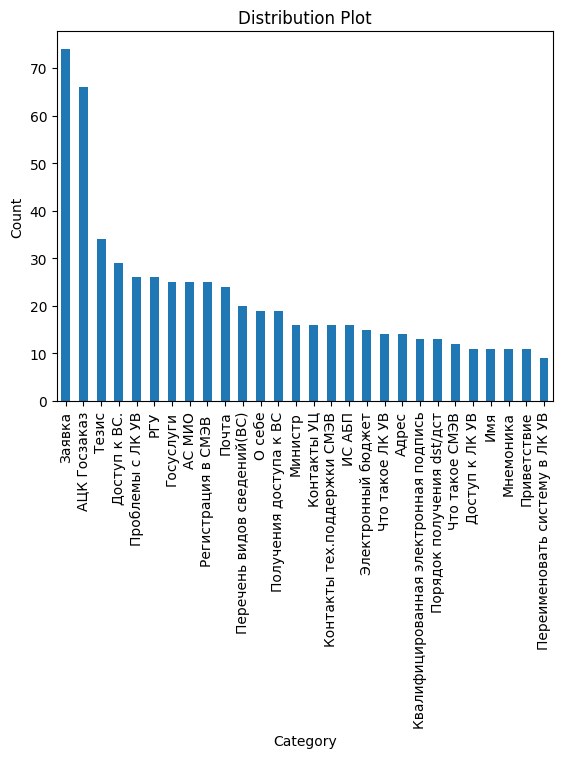

Заявка                                   74
АЦК Госзаказ                             66
Тезис                                    34
Доступ к ВС.                             29
Проблемы с ЛК УВ                         26
РГУ                                      26
Госуслуги                                25
АС МИО                                   25
Регистрация в СМЭВ                       25
Почта                                    24
Перечень видов сведений(ВС)              20
О себе                                   19
Получения доступа к ВС                   19
Министр                                  16
Контакты УЦ                              16
Контакты тех.поддержки СМЭВ              16
ИС АБП                                   16
Электронный бюджет                       15
Что такое ЛК УВ                          14
Адрес                                    14
Квалифицированная электронная подпись    13
Порядок получения dst/дст                13
Что такое СМЭВ                  

In [44]:
cateroies=df['Категория'].unique()
values=df['Категория'].value_counts()
import matplotlib.pyplot as plt

categories = df['Категория'].unique()
values = df['Категория'].value_counts()
data_dist = pd.Series(values)
# Plot the distribution using a bar plot
data_dist.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution Plot')

plt.show()
values



Уменьшение двух повышенных классов не помогают увеличть точность accuracy

In [45]:
from sklearn.utils import resample
class_majority = df[df['Категория'] == 'АЦК Госзаказ']

# Уменьшение класса с большим количеством примеров
class_majority_downsampled = resample(class_majority,
                                     replace=False,    # Удаление примеров без повторения
                                     n_samples=40,    # Желаемый размер уменьшенного класса
                                     random_state=42)  # Зафиксированный random state для воспроизводимости

df = pd.concat([df[df['Категория'] != 'АЦК Госзаказ'], class_majority_downsampled])
# Проверка нового размера класса
class_majority_downsampled.shape[0]


40

In [46]:
class_majority = df[df['Категория'] == 'Заявка']

# Уменьшение класса с большим количеством примеров
class_majority_downsampled = resample(class_majority,
                                     replace=False,    # Удаление примеров без повторения
                                     n_samples=45,    # Желаемый размер уменьшенного класса
                                     random_state=42)  # Зафиксированный random state для воспроизводимости

df = pd.concat([df[df['Категория'] != 'Заявка'], class_majority_downsampled])
# Проверка нового размера класса
class_majority_downsampled.shape[0]

45

Поэтому я увеличил категории которых мало

In [47]:
import pandas as pd

# Предположим, что у вас есть DataFrame df с колонками "features" и "label"
# и класс с малым количеством данных имеет метку "class_1"

# Выделение данных для класса с малым количеством данных
class_1_data = df[df['Категория'] == 'Приветствие']
class_2_data = df[df['Категория'] == 'Переименовать систему в ЛК УВ']

# Определение множителя для дублирования данных (в данном случае - 3)
multiplier = 2

# Дублирование данных для класса 1
duplicated_data = pd.concat([class_1_data] * multiplier, ignore_index=True)
# Дублирование данных для класса 2
duplicated_data2 = pd.concat([class_2_data] * multiplier, ignore_index=True)

# Находим индекс последней дублированной строки
last_duplicate_index = duplicated_data.index.max()
last_duplicate_index2 = duplicated_data2.index.max()

# Вставка данных после последней дублированной строки
df = pd.concat([df.iloc[:last_duplicate_index + 1], duplicated_data, df.iloc[last_duplicate_index + 1:]], ignore_index=True)

df = pd.concat([df.iloc[:last_duplicate_index2 + 1], duplicated_data2, df.iloc[last_duplicate_index2 + 1:]], ignore_index=True)


In [48]:
# Assuming 'Text' column contains the text data
text_data = df['Вопрос']
text_data

0                                        Что такое СМЭВ?
1                                         что такое смэв
2                                                   СМЭВ
3                           Как можно использовать смэв 
4      Для чего Система межведомственного электронног...
                             ...                        
590                                     Ошибка при входе
591                                  Как оставить заявку
592                                               Ошибка
593                         как позвонить в техподдержку
594                                         Починить МФУ
Name: Вопрос, Length: 595, dtype: object

In [49]:
import re
patterns = "[A-Za-z0-9!#$%&'()*+,.``'«»'/:;<=>?@[\]^_`{|}~—\"\-]+"

In [50]:
def clean(doc):
    doc = re.sub(patterns, ' ', doc)
    return doc
text_data.apply(clean)

0                                        Что такое СМЭВ 
1                                         что такое смэв
2                                                   СМЭВ
3                           Как можно использовать смэв 
4      Для чего Система межведомственного электронног...
                             ...                        
590                                     Ошибка при входе
591                                  Как оставить заявку
592                                               Ошибка
593                         как позвонить в техподдержку
594                                         Починить МФУ
Name: Вопрос, Length: 595, dtype: object

#### Токенизация и добавление стоп-слов

In [51]:
# Tokenize the text data
tokenized_data = []
custom_stop_words=[]
import re
patterns = "[A-Zoryvectmail0-9!#$%&'()*+,.``'«»'/:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
stopwords_ru.remove("ты")
stopwords_ru.remove("не")
stopwords_ru.remove("о")
stopwords_ru.remove("себе")
stopwords_ru.remove("тебя")
stopwords_ru.append("что")
stopwords_ru.append("такой")
morph = MorphAnalyzer()


In [52]:
stopwords_ru.append('доступ')
stopwords_ru.append('взаимодействие')

#### Лемматизация
Приведение словоформы к нормальной форме


*   кошками → кошка
*   бежал → бежать
*   бежал → бежать








In [53]:
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)

    tokens = []
    for token in doc.split():
        token = token.strip().lower()
        if token not in ['тебя','себе','не','что']:
          token = morph.normal_forms(token)[0]
          if token.strip() and token not in stopwords_ru:
            tokens.append(token)
        else:
          tokens.append(token)
    return tokens

In [54]:
tokens = text_data.apply(lemmatize)


#### Декодирование Категорий в цифры


In [55]:
from sklearn.preprocessing import LabelEncoder
label=df['Категория'].values


Преобразование текста в частотные векторы слова с помощью  TfidfVectorizer.

**Метод TF-IDF**
Чуть более сложный и продвинутый метод определения значимости слов в тексте называется TF-IDF (term frequency — inverse document frequency).

Основная идея
Если слово часто встречается во всех документах (это в первую очередь касается предлогов, союзов и других стоп-слов), то вряд ли эти слова имеют большое значение. И наоборот, если слово встречаться только в одном документе, вероятно оно в большей степени определяет его содержание.

Другими словами, определяется не только значимость слова в тексте, но и значимость слова с учётом всех текстов.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = [' '.join(token) for token in tokens]
text = [s.replace("ува", "ув") for s in text]
text = [s.replace("мнемоник", "мнемоника") for s in text]
tfidfconverter = TfidfVectorizer(use_idf = True)
X = tfidfconverter.fit_transform(text)


Мы можем посмотреть какие слова остались после фильтрации.



In [57]:
print(tfidfconverter.get_feature_names_out())

['ds' 'аббревиатура' 'аббривеиатура' 'абп' 'административный' 'адрес'
 'аис' 'активировать' 'активный' 'арма' 'ас' 'ацк' 'бланк' 'болезнь'
 'борисович' 'бюджет' 'бюджетный' 'ваш' 'ввод' 'взять' 'вид' 'включаться'
 'внесение' 'внести' 'возглавлять' 'войти' 'вопрос' 'восстановить'
 'восстановление' 'вс' 'всё' 'вход' 'вылетать' 'гис' 'главный' 'гмп' 'гос'
 'госзаказ' 'госпошлина' 'госуслуга' 'график' 'графика' 'грузить'
 'далёкий' 'данные' 'дата' 'дать' 'делать' 'дело' 'делопроизводитель'
 'день' 'добавить' 'добрый' 'документ' 'долго' 'должный' 'домен' 'досье'
 'дратуть' 'дст' 'егрн' 'есиа' 'ехничёска' 'загружаться' 'загрузаться'
 'загрузить' 'загрузка' 'зайти' 'заказ' 'закончиться' 'закрытый' 'закупка'
 'замена' 'заменить' 'замещение' 'заниматься' 'записаться' 'запись'
 'заполнение' 'заполнить' 'заполняемость' 'запрос' 'запросить' 'запуск'
 'запускаться' 'зарегистрировать' 'заходить' 'заявка' 'заявление' 'звать'
 'здаров' 'здравствуй' 'здравствуйте' 'значит' 'игорь' 'извещение'
 'изменен

Посмотрим на количество документов и количество токенов (слов)

In [58]:
X.shape

(595, 352)

Рассчитаем значение TF-IDF для каждого слова по каждому тексту.



In [59]:
# посмотрим на значение TF-IDF для конкретного слова в конкретном документе
# чем оно уникальнее для конкретного документа, тем выше показатель
df_tfidf = pd.DataFrame(X.toarray(), columns = tfidfconverter.get_feature_names_out())
# pd.DataFrame(df_tfidf.T.to_csv('bow.csv')
df_tfidf.T


,0,1,2,3,4,5,6,7,8,9,...,585,586,587,588,589,590,591,592,593,594
ds,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
аббревиатура,0.0,0.0,0.0,0.0,0.000000,0.723755,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
аббривеиатура,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
абп,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
административный,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
электронный,0.0,0.0,0.0,0.0,0.567611,0.000000,0.0,0.521294,0.0,0.567611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
эп,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
это,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
юу,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Рассчитаем среднее значение TF-IDF для каждого слова по всем текстам.

#### Обучение модели на основе случайного леса

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_tfidf,label,stratify=label,test_size=0.25,random_state=42)
classifier = RandomForestClassifier(n_estimators=1000, random_state=3)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=3)

Метрики обучения модели

In [61]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  9  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Точность 80 процентов обусловлена маленьким кол-вом данных

Предсказание результатов

In [62]:
docs=[]
threshold = 0.5
tries=3
history=[]
index=0

while tries!=0:
  docs=[]
  qustion=input('Введите сообщение!: ')
  docs.append(qustion)
  history.append(qustion)
  docs=tfidfconverter.transform(docs)
  # Make predictions on the new documents
  predicted = classifier.predict(docs)
  nonzero_indices = docs.nonzero()

  if (len(nonzero_indices[0])> 0) and (len(nonzero_indices[1]>0)):
      weights = [docs[i, j] for i, j in zip(nonzero_indices[0], nonzero_indices[1])]
      maximum_weight = max(weights)

      if(maximum_weight>=threshold):
        index=df[df['Категория'] == predicted[0]]['Ответ'].index[0]
        print(df[df['Категория'] == predicted[0]]['Ответ'][index])
      else:
        tries-=1
        print(f"Повторите попытку! Осталось {tries} попыток")
  else:
        tries-=1
        print(f"Повторите попытку! Осталось {tries} попыток")


Введите сообщение!: привет


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Вам необходимо обратиться с заявкой в тех поддержку ОГКУ "ЦИТО" по адресу sd@mininform74.ru. В крайнем случае Вы можете обратиться по номеру телефона: 8 (351) 211-68-21.
Введите сообщение!: что умеешь?
Я бот технической поддержки ОГКУ "ЦИТО". Могу ответить на вопросы про системы СМЭВ, ЛК УВ, ИС АБП. Подскажу как получить dst и зачем нужна мнемоника. Спрашивайте!
Введите сообщение!: что такое смэв
Система межведомственного электронного взаимодействия, предназначенная для организации информационного взаимодействия между информационными системами участников СМЭВ в целях предоставления государственных и муниципальных услуг и исполнения государственных и муниципальных функций в электронной форме.
Введите сообщение!: что такое лк ув
Личный кабинет участника взаимодействия (ЛК УВ) используется в
организациях для регистрации информационных систем в СМЭВ 3, обновления
сертификата ЭП информационной системы и получения доступа к
видам сведений.
Основные доступные возможности ЛК УВ:
Регистрация ин

KeyboardInterrupt: ignored

In [63]:
docs_new = ['здравствуйте', 'ты кто?','расскажи что такое смэв?','что такое лк ув','аааааа',"как получить доступ к вс?","как тебя зовут?","какое у тебя имя","что умеешь?"]
import numpy as np
threshold = 0.5
docs=tfidfconverter.transform(docs_new)
# Make predictions on the new documents
predicted = classifier.predict(docs)

# Print the predictions
for doc, category in zip(docs, predicted):
  # print(f"{doc} ")
  nonzero_indices = doc.nonzero()
  if len(nonzero_indices[0]) > 0:
    weights = [doc[i, j] for i, j in zip(nonzero_indices[0], nonzero_indices[1])]
    maximum_weight = max(weights)
    # print(f"The maximum weight is: {maximum_weight}")
    if(maximum_weight>=threshold):
      print(category)
    else:
      print("There are no non-zero elements in the document.1")
  else:
    print("There are no non-zero elements in the document.2")




Приветствие
О себе
Что такое СМЭВ
Что такое ЛК УВ
There are no non-zero elements in the document.2
Доступ к ВС.
Имя
Имя
О себе
